<a href="https://colab.research.google.com/github/lemcat55/w6StatCalc/blob/main/Week6_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1: Load libraries, read/enter data, define helper functions

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection 
from sklearn import linear_model
from scipy.stats import f
import statsmodels.api as sm

##########     to read data from a file:####################################### 

df=pd.read_csv("http://algorain.com/Courses/Statistics/w6/Passengers.csv")
independant='nPassengers'
dependant='Cost'

# to read from another file, uncomment the following three lines:
#df=pd.read_csv("http://algorain.com/Courses/Statistics/w1/Project_Data_Set2.csv")
#independant='Calls (X1)'
#dependant='Sales (Y)'

# or these 3 lines:
#df=pd.read_csv("http://algorain.com/Courses/Statistics/w6/RealEstate.csv")
#independant='Footage'
#dependant='Price'

#######               to enter data manually, use three following lines:
#df = pd.DataFrame({'x':[1,12,9,6,4,3,2],'y':[10,4,4,5,7,7,9]})
#independant='x'
#dependant='y'
################################################################################
df = df.sort_values(by = independant)
x=np.array(df[independant]).reshape((-1, 1))
y=np.array(df[dependant])

def cipi(b0,b1,SSxx,se,n,conf,xBar,x0):
  y=b0+b1*x0
  alpha=1-conf
  t=stats.t.ppf(1-alpha/2,n-2,loc=0,scale=1)
  d=1/n+(x0-xBar)*(x0-xBar)/SSxx
  ci=[y-t*se*np.sqrt(d),y+t*se*np.sqrt(d)]
  pi=[y-t*se*np.sqrt(1+d),y+t*se*np.sqrt(1+d)]
  return [ci,pi]

def stex(x,n):
  xa=np.average(x)
  n=len(x)
  SSxx=((x-xa)*(x-xa)).sum()
  return np.sqrt(SSxx/(n-1))
def stexy(x,y,n):
  xa=np.average(x)
  ya=np.average(y)
  n=len(y)
  SSxx=((x-xa)*(x-xa)).sum()
  SSyy=((y-ya)*(y-ya)).sum()
  xy=(x-xa).T*(y-ya)
  xysum=xy.sum()
  se=np.sqrt((SSyy-xysum*xysum/SSxx)/(n-2))
  return se
def steSlope(x,y,yHat,n):
  xa=np.average(x)
  n=len(y)
  SSxx=((x-xa)*(x-xa)).sum()
  SSyy=((y-yHat)*(y-yHat)).sum()
  return np.sqrt(SSyy/SSxx/(n-2))


#2: Graph Linear Regression, test slope hypotheses, and find slope's condifencew interval

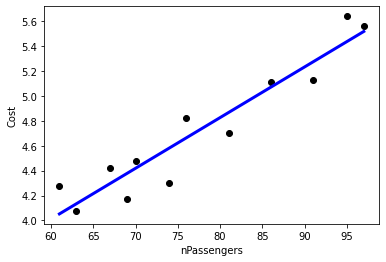

n: 12
Slope: 0.040702
y-intercept: 1.569793
Correlation Coefficient: 0.9482
Coefficient of Determination: 0.899084
Standard Error, se=  0.177217
Standard Error of x, sx= 12.391346
Standard Error of y, sy= 0.5319
Standard Error of the Slope, sb= 0.004312
Claim: slope=0
alpha= 0.05
H0: slope=0
H1: slope!=0
Test Statistic, ts = 9.438865335182491
Nonrejection region = [ -2.2281388519649385 , 2.2281388519649385 ]
pValue= 2.691643621988149e-06
Reject H0
With confidence 0.95
	lower slope limit = 0.031094
	upper slope limit = 0.05031


In [ ]:
##  Enter your data #################
Claim='slope=0'
alpha=0.05 # for hypotheses testing
confSlope=0.95 # confidence level for slope
##############
conf=1-alpha
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)
plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)
plt.xlabel(independant)
plt.ylabel(dependant)
plt.show()

m=6# display precission
n=len(y)
print('n:',n)
b1=model.coef_[0]
print('Slope:', np.round(b1,m))
b0=model.intercept_
print('y-intercept:', np.round(b0,m))
print('Correlation Coefficient:',np.round(feature_selection.r_regression(x, y),m)[0])
print('Coefficient of Determination:', np.round(model.score(x, y),m))
ser=stexy(x,y,n)
print ("Standard Error, se= ",np.round(ser,m))
sx=stex(x,n)
print('Standard Error of x, sx=',np.round(sx,m))
sy=stex(y,n)
print('Standard Error of y, sy=',np.round(sy,m))
sb=ser/(sx*np.sqrt(n-1))
print('Standard Error of the Slope, sb=',np.round(sb,m))
ts=b1/sb
#print('Test statistic, ts =', ts)
print('Claim: '+Claim)
print('alpha=',alpha)
p1=stats.t.cdf(ts,n-2)
p2=1-p1
p12=2*p2#two-sided
if p12>1: p12=1
signs=["<=",">=","!=","=","<",">",""]
for sign in signs:
  pr=Claim.split(sign)
  if len(pr)==2: 
    break
mup=pr[0].strip()
value=pr[1].strip()
if sign=='=' or sign=="!=":
  H0='H0: slope='+value
  H1='H1: slope!='+value
  t1=stats.t.ppf(alpha/2,n-2,loc=0,scale=1)
  t2=-t1
  pValue=p12
elif sign=='<' or sign=='>=':
  H0='H0: slope>='+value
  H1='H1: slope<'+value
  t1=stats.t.ppf(alpha,n-2,loc=0,scale=1)
  t2='inf'
  pValue=p1
else: 
  H0='H0: slope<='+value
  H1='H1: slope>'+value
  t1='-inf'
  t2=stats.t.ppf(1-alpha,n-2,loc=0,scale=1)
  pValue=p2

print(H0)
print(H1)
print('Test Statistic, ts =',ts)
print("Nonrejection region = [",t1,",",t2,"]")
print('pValue=',pValue)
if pValue<alpha: print('Reject H0')
else: print('Fail to reject H0')
x1=stats.t.ppf((1-confSlope)/2,n-2,loc=b1,scale=sb)
x2=stats.t.ppf((1+confSlope)/2,n-2,loc=b1,scale=sb)
print('With confidence', confSlope)
print('\tlower slope limit =',np.round(x1,m))
print('\tupper slope limit =',np.round(x2,m))

# 3: Graph Prediction and Confidence Intervals as functions of x; calculate them for given x0

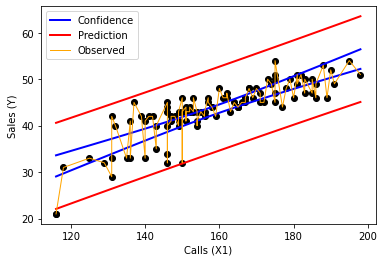

x0= 160
Confidence level: 0.99
Confidence Interval= [42.769597791081054, 44.5694570754106]
Prediction Interval= [34.64247556280017, 52.69657930369148]


In [ ]:
##  Enter your data #################
x0=160
confCIPI=0.99 # confidence level for CI and PI
##########################################
x1=x
x2 = sm.add_constant(x1) 

xa=np.average(x1)
n=len(x1)
xx=(x1-xa)*(x1-xa)
SSxx=xx.sum()


lower_p=[]
upper_p=[]
lower_c=[]
upper_c=[]
for e in x1:
  cp=cipi(b0,b1,SSxx,ser,n,confCIPI,xa,e[0])
  lower_p.append(cp[1][0])
  upper_p.append(cp[1][1])
  lower_c.append(cp[0][0])
  upper_c.append(cp[0][1])
 
plt.plot(x, lower_c, color="blue", linewidth=2,label='Confidence')
plt.plot(x, upper_c, color="blue", linewidth=2)
plt.plot(x, lower_p, color="red", linewidth=2, label='Prediction')
plt.plot(x, upper_p, color="red", linewidth=2)
#plt.plot(x, y_pred, color="black", linewidth=0.5, label='Regression')
plt.plot(x, y, color="orange", linewidth=1, label='Observed')
plt.scatter(x, y, color="black")
plt.legend(loc="upper left")
plt.xlabel(independant)
plt.ylabel(dependant)
plt.show()
cp=cipi(b0,b1,SSxx,ser,n,confCIPI,xa,x0)
print('x0=',x0)
print('Confidence level:',confCIPI)
print('Confidence Interval=',cp[0])
print('Prediction Interval=',cp[1])

# 4: Calculate Prediction and Confidence Intervals for a given set of parramrters

In [ ]:
##  Enter your data #################
b0=5.23 # y-intercept
b1=2.74 # slope
SSxx=55.87 
se=10.71 #standard error
n=24
conf=0.90 # level of confidence
xBar=12.56 # mean of the sample x
x0=11 # point of interest
######################################
def cipi(b0,b1,SSxx,se,n,conf,xBar,x0):
  y=b0+b1*x0
  alpha=1-conf
  t=stats.t.ppf(1-alpha/2,n-2,loc=0,scale=1)
  d=1/n+(x0-xBar)*(x0-xBar)/SSxx
  ci=[y-t*se*np.sqrt(d),y+t*se*np.sqrt(d)]
  pi=[y-t*se*np.sqrt(1+d),y+t*se*np.sqrt(1+d)]
  return [ci,pi]

cp=cipi(b0,b1,SSxx,se,n,conf,xBar,x0)
print('Confidence Interval=',cp[0])
print('Prediction Interval=',cp[1])


Confidence Interval= [30.0011706381255, 40.73882936187451]
Prediction Interval= [16.21173560164092, 54.528264398359084]


# 5: 1-D ANOVA

In [ ]:
import pandas as pd 
import numpy as np 
from sklearn import linear_model
from scipy.stats import f
##  Enter your data #####################################################
df=pd.read_csv("http://algorain.com/Courses/Statistics/w1/Project_Data_Set2.csv")
sIndependant='Calls (X1)'
sDependant='Sales (Y)'
point_of_interest=[160.]
#########################################################################
X = df[[sIndependant]]
y1 = df[sDependant]
print(df.head())
print('(rows,cols) =',df.shape)
m=6 # display pesicion
k =X.shape[1]
n=X.shape[0]
yBar=y1.mean()
model = linear_model.LinearRegression()
model.fit(X, y1)
b1=model.coef_
b0=model.intercept_
pred_col=model.predict(X)
SSR=((pred_col-yBar)**2).sum()
dy=df[sDependant]-pred_col
SSE=(dy**2).sum()
MSE=SSE/(n-k-1)
se=np.sqrt(MSE)
R2=SSR/(SSR+SSE)
R=np.sqrt(R2)
AdjR2=1-SSE*(n-1)/((SSR+SSE)*(n-k-1))
print('\nSUMMARY OUTPUT\n')
print('Regression Statistics')
print('Multiple R:\t', R)
print('R square:\t', R2)
print('Adjasted R:\t', AdjR2)
print('Observations:\t', n)
print('\nANOVA')
MSR=SSR/k
MSE=SSE/(n-k-1)
F=MSR/MSE
p = 1 - f.cdf(F,k,n-k-1)
d={'':['Regression','Residual','Total'],\
   'df':[k,	n-k-1, n-1],\
   'SS':[str(np.round(SSR,m)),str(np.round(SSE,m)),str(np.round(SSE+SSR,m))],\
   'MS':[str(np.round(MSR,m)),str(np.round(MSE,m)),''],\
   'F':[str(np.round(F,m)),'',''],\
   'Significance':[str(np.round(p,2*m)),'','']}
df = pd.DataFrame(d) 
print(df)
s='\nModel: '+dependant+" = "+str(np.round(b0,m))
i=0
for col in X.columns:
    s+=' + ('+str(np.round(b1[i],m))+') * '+col
    i+=1
print(s)
print('\nFor X =', point_of_interest,'  Y =',b0+(b1*point_of_interest).sum())

   Sales (Y)  Calls (X1)  Time (X2)  Years (X3)    Type
0         21         116       19.9           3    NONE
1         21         116       18.0           2   GROUP
2         31         118       19.4           4  ONLINE
3         33         125       16.9           2  ONLINE
4         32         129       18.5           2   GROUP
(rows,cols) = (100, 5)

SUMMARY OUTPUT

Regression Statistics
Multiple R:	 0.8360780040937277
R square:	 0.6990264289293513
Adjasted R:	 0.6959552700408753
Observations:	 100

ANOVA
               df           SS           MS           F Significance
0  Regression   1  2661.018858  2661.018858  227.609985          0.0
1    Residual  98  1145.731142    11.691134                         
2       Total  99      3806.75                                      

Model: Cost = -1.176428 + (0.280287) * Calls (X1)

For X = [160.0]   Y = 43.669527433245825
